Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

,Dissimilarity,Correlation,Label
0,34.557883,0.688057,0
1,38.243604,0.506442,0
2,34.323426,0.613643,0
3,36.719204,0.661921,0
4,34.136768,0.609182,0
...,...,...,...
88,39.920562,0.629115,2
89,43.342493,0.553581,2
90,10.176303,0.928372,2
91,28.669184,0.752410,2


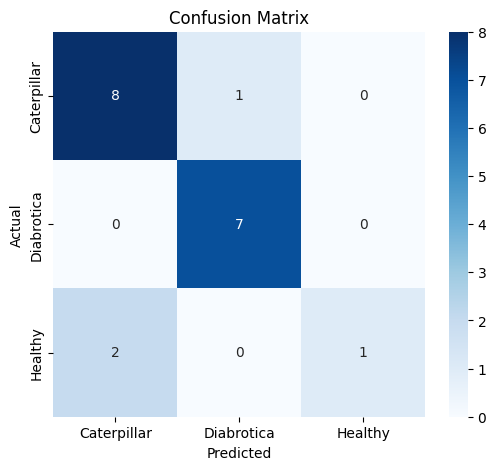

Class 0 - TP (True Positive): 8
Class 0 - Class 1:
  - FN (False Negative): 1
  - FP (False Positive): 0
  - TN (True Negative): 2
Class 0 - Class 2:
  - FN (False Negative): 0
  - FP (False Positive): 2
  - TN (True Negative): 1
Class 1 - Class 0:
  - FN (False Negative): 0
  - FP (False Positive): 1
  - TN (True Negative): 2
Class 1 - TP (True Positive): 7
Class 1 - Class 2:
  - FN (False Negative): 0
  - FP (False Positive): 0
  - TN (True Negative): 3
Class 2 - Class 0:
  - FN (False Negative): 2
  - FP (False Positive): 0
  - TN (True Negative): 1
Class 2 - Class 1:
  - FN (False Negative): 0
  - FP (False Positive): 0
  - TN (True Negative): 3
Class 2 - TP (True Positive): 1
Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.88      1.00      0.93         7
           2       1.00      0.33      0.50         3

    accuracy                           0.84        1

In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from PIL import Image
# from skimage import data
from google.colab import drive, files
drive.mount('/content/drive')

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split
import os

# Define the path to the folders containing the images
caterpillar_folder = "/content/drive/MyDrive/Archive_SVM/Caterpillar" # change with your folder
diabrotica_folder = "/content/drive/MyDrive/Archive_SVM/Diabrotica_speciosa" # change with your folder
healthy_folder = "/content/drive/MyDrive/Archive_SVM/Healthy" # change with your folder

# Initialize an empty list to store the dataset
dataset = []

# Function to process images in a folder
def process_folder(folder, label):
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Calculate GLCM properties for the entire image
            # angles for glcm is 0, 45, 90, and 135
            glcm = greycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
            dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
            correlation = greycoprops(glcm, 'correlation')[0, 0]

            dataset.append([dissimilarity, correlation, label])

# Process images in the "caterpillar" folder (label 0)
process_folder(caterpillar_folder, 0)

# Process images in the "diabrotica" folder (label 1)
process_folder(diabrotica_folder, 1)

# Process images in the "healthy" folder (label 2)
process_folder(healthy_folder, 2)

# Create a DataFrame for the dataset
column_names = ["Dissimilarity", "Correlation", "Label"]
df = pd.DataFrame(dataset, columns=column_names)
display(df)

# Split the dataset into features (X) and the target variable (y)
X = df[["Dissimilarity", "Correlation"]]
y = df["Label"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Plot and display the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Caterpillar", "Diabrotica", "Healthy"], yticklabels=["Caterpillar", "Diabrotica", "Healthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# print("Confusion Matrix:")
# print("TN (True Negative):", confusion_mat[0, 0])
# print("FP (False Positive):", confusion_mat[0, 1])
# print("FN (False Negative):", confusion_mat[1, 0])
# print("TP (True Positive):", confusion_mat[1, 1])

# Print TN, FP, FN, TP for each class
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        if i == j:
            print(f"Class {i} - TP (True Positive): {confusion_mat[i, j]}")
        else:
            print(f"Class {i} - Class {j}:")
            print(f"  - FN (False Negative): {confusion_mat[i, j]}")
            print(f"  - FP (False Positive): {confusion_mat[j, i]}")
            print(f"  - TN (True Negative): {sum(confusion_mat[~np.eye(3, dtype=bool)]) - confusion_mat[i, j] - confusion_mat[j, i]}")

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)